# 파생변수 실습1

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [5]:
data = {'이름' :['홍길동','성춘향','이몽룡','김철수','김영희','김만수','오지랖','만순이','문정억','백만원','천만원','수십억','현재미'],
        '몸무게':[95,85,75,70,65,55,120,100,71,65,75,100,77],
        '키':[170,170,170,170,170,175,171,165,164,177,163,192,182],
        '거주지':['서울','대구','대전','서울','경북','서울','경북','서울','서울','전남','전북','경북','서울'],
        '주민번호':['81XXXX-1XXXXXX','81XXXX-1XXXXXX','79XXXX-2XXXXXX','71XXXX-1XXXXXX','65XXXX-2XXXXXX','81XXXX-1XXXXXX','63XXXX-1XXXXXX','81XXXX-3XXXXXX','81XXXX-1234562','55XXXX-1234562','71XXXX-2234562','92XXXX-1234562','85XXXX-2234562'],
        '흡연여부':['흡연','미흡연','미흡연','흡연','흡연','미흡연','흡연','흡연','흡연','미흡연','미흡연','미흡연','미흡연']}

In [12]:
df = pd.DataFrame(data)
df.head()

,이름,몸무게,키,거주지,주민번호,흡연여부
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연


In [13]:
df_mod = df.copy()

In [15]:
encoding = LabelEncoder()

encoding.fit(df_mod['이름'])

df_mod['이름_인코딩'] = encoding.transform(df_mod['이름'])

In [21]:
print(list(encoding.classes_))
print(list(encoding.inverse_transform([1,0])))

['김만수', '김영희', '김철수', '만순이', '문정억', '백만원', '성춘향', '수십억', '오지랖', '이몽룡', '천만원', '현재미', '홍길동']
['김영희', '김만수']


In [24]:
encoding2 =  LabelEncoder()

encoding2.fit(df_mod['흡연여부'])

df_mod['흡연여부_인코딩'] = encoding2.transform(df_mod['흡연여부'])

In [25]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1


In [30]:
CutYear = 2022

def stdInfo(rrn):
    if int(rrn[:2]) < 21 and int(rnn[7]) in (3,4) :
        birYear = 2022 + int(rrn[:2])
    else:
        birYear = 1900 + int(rrn[:2])
    return CutYear - birYear


In [31]:
df_mod['나이'] = df_mod['주민번호'].apply(stdInfo)

In [44]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57


In [47]:
def sex(rrn):
    if int(rrn[7]) ==1 or int(rrn[7]) == 3 :
        gen = '남'
    else:
        gen = '여'
        
    return gen

df_mod['성별'] = df_mod['주민번호'].apply(sex)

df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여


In [50]:
# 성별 onehot

one_encoding = OneHotEncoder(sparse = False)

df_mod_one = pd.DataFrame(one_encoding.fit_transform(df_mod[['성별']]),columns = ['남','여'])

In [61]:
df_mod = pd.concat([df_mod, df_mod_one],axis=1)

In [62]:
df_mod

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별,남,여
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남,1.0,0.0
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남,1.0,0.0
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여,0.0,1.0
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남,1.0,0.0
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여,0.0,1.0
5,김만수,55,175,서울,81XXXX-1XXXXXX,미흡연,0,0,41,남,1.0,0.0
6,오지랖,120,171,경북,63XXXX-1XXXXXX,흡연,8,1,59,남,1.0,0.0
7,만순이,100,165,서울,81XXXX-3XXXXXX,흡연,3,1,41,남,1.0,0.0
8,문정억,71,164,서울,81XXXX-1234562,흡연,4,1,41,남,1.0,0.0
9,백만원,65,177,전남,55XXXX-1234562,미흡연,5,0,67,남,1.0,0.0


In [65]:
df_mod['나이_범주'] = pd.cut(df_mod.나이, bins = [0,10,20,30,40,50,60,70],labels = [0,10,20,30,40,50,60])

In [66]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별,남,여,나이_범주
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남,1.0,0.0,40
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남,1.0,0.0,40
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여,0.0,1.0,40
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남,1.0,0.0,50
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여,0.0,1.0,50


In [76]:
df_mod.eval('BMI = 몸무게 / ((키/100) * (키/100))',inplace=True)

In [78]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별,남,여,나이_범주,BMI
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남,1.0,0.0,40,32.871972
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남,1.0,0.0,40,29.411765
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여,0.0,1.0,40,25.951557
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남,1.0,0.0,50,24.221453
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여,0.0,1.0,50,22.491349


In [86]:
wei = [0,18,23,25,30,90]
label = ['저체중', '정상', '과체중', '비만', '고도비만']

df_mod['BMI분류'] = pd.cut(df_mod.BMI, bins = wei,labels=label)
df_mod['BMI분류코드'] = df_mod['BMI분류'].map({'저체중' : 0, '정상':1, "과체중" :2, "비만":3, "고도비만" : 4})



In [87]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별,남,여,나이_범주,BMI,BMI분류,BMI분류코드
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남,1.0,0.0,40,32.871972,고도비만,4
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남,1.0,0.0,40,29.411765,비만,3
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여,0.0,1.0,40,25.951557,비만,3
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남,1.0,0.0,50,24.221453,과체중,2
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여,0.0,1.0,50,22.491349,정상,1


In [89]:
date_pre = df_mod[['나이_범주', '남',"여","흡연여부_인코딩",'키','몸무게','BMI분류코드']]
date_pre

,나이_범주,남,여,흡연여부_인코딩,키,몸무게,BMI분류코드
0,40,1.0,0.0,1,170,95,4
1,40,1.0,0.0,0,170,85,3
2,40,0.0,1.0,0,170,75,3
3,50,1.0,0.0,1,170,70,2
4,50,0.0,1.0,1,170,65,1
5,40,1.0,0.0,0,175,55,0
6,50,1.0,0.0,1,171,120,4
7,40,1.0,0.0,1,165,100,4
8,40,1.0,0.0,1,164,71,3
9,60,1.0,0.0,0,177,65,1


# 이상치 제거 실습2


In [67]:
import os
import warnings
warnings.simplefilter(action= 'ignore', category= FutureWarning)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'

sns.set(font= font_family, rc = {"axes.unicode_minus" : False})


In [68]:
os.getcwd()

'C:\\Users\\user\\Desktop\\titanic'

In [69]:
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

In [71]:
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

In [72]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [73]:
train_test_data = [train,test]

In [74]:
type(train_test_data)

list

In [75]:
type(train)

pandas.core.frame.DataFrame

In [82]:
data = train.copy()

print(data.shape)

(891, 12)


In [83]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [84]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
numerical_feats = data.dtypes[data.dtypes == "int64"].index
numerical_feats = numerical_feats.append(data.dtypes[data.dtypes == "float64"].index)
print("연속형 변수 카운트 : ",len(numerical_feats))


연속형 변수 카운트 :  7


In [93]:
numerical_feats

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare'], dtype='object')

In [94]:
for col in numerical_feats:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(data[col].skew()),
          "    ",
          'Kurtosis : {:06.2f}'.format(data[col].kurt())           
         )

PassengerId     Skewness: 00.00      Kurtosis : -01.20
Survived        Skewness: 00.48      Kurtosis : -01.78
Pclass          Skewness: -0.63      Kurtosis : -01.28
SibSp           Skewness: 03.70      Kurtosis : 017.88
Parch           Skewness: 02.75      Kurtosis : 009.78
Age             Skewness: 00.39      Kurtosis : 000.18
Fare            Skewness: 04.79      Kurtosis : 033.40


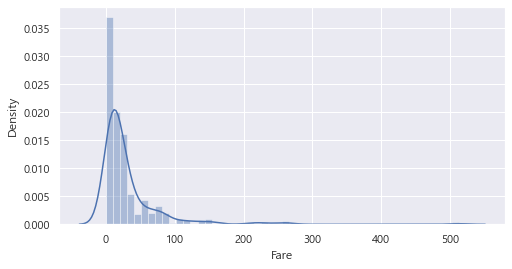

In [99]:
f, ax= plt.subplots(figsize = (8,4))

_=sns.distplot(data['Fare'])

Skewness : 0.395
Kurtosis : 0.976


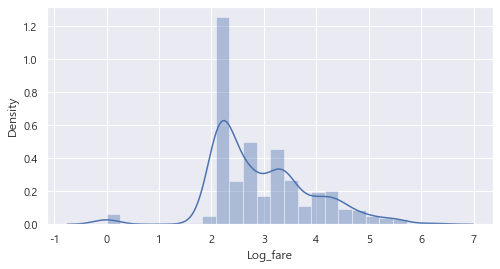

In [102]:
data['Log_fare'] = np.log1p(data["Fare"])
f,ax = plt .subplots(figsize = (8,4))
sns.distplot(data['Log_fare'])
print('Skewness : {:.3f}'.format(data['Log_fare'].skew()))
print('Kurtosis : {:.3f}'.format(data['Log_fare'].kurt()))


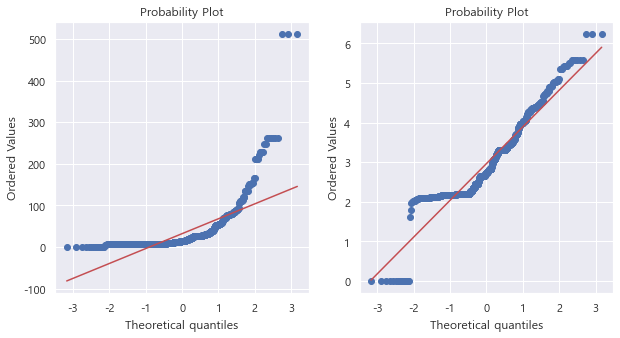

In [103]:
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)
res = stats.probplot(data['Fare'],plot=plt)
fig.add_subplot(1,2,2)
res = stats.probplot(data['Log_fare'],plot=plt)

In [104]:
train_test_data[0].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
scaler = MinMaxScaler()
for dataset in train_test_data:
    array = dataset['Age'].values.reshape(-1,1)
    scaler.fit(array)
    dataset['AgeScale'] = pd.Series(scaler.transform(array).reshape(-1))
    
    
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeScale,FareScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531,-0.486337


In [107]:
print(train['Age'].min())
print(train['Age'].max())
print(' ')
print(train['AgeScale'].min())
print(train['AgeScale'].max())


0.42
80.0
 
0.0
1.0


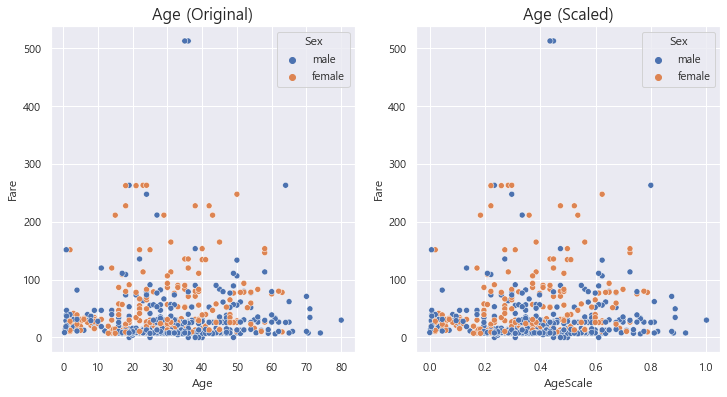

In [109]:

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
scatter_plot = sns.scatterplot(x='Age',y='Fare',hue = 'Sex',data=train)
plt.title('Age (Original)', fontsize= 16)
plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(x='AgeScale',y='Fare',hue = 'Sex',data= train)
plt.title('Age (Scaled)',fontsize=16)
plt.show()

In [120]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeScale,FareScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531,-0.486337


In [112]:
for dataset in train_test_data:
    dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'),inplace=True)
scaler = StandardScaler()

for dataset in train_test_data:
    array = dataset['Fare'].values.reshape(-1,1)
    
    scaler.fit(array)
    dataset['FareScale'] = pd.Series(scaler.transform(array).reshape(-1))
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeScale,FareScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531,-0.486337


In [113]:
print(train['Fare'].mean())
print(train['Fare'].var())
print('\n')
print(train['FareScale'].mean())
print(train['FareScale'].var())

32.2042079685746
2469.436845743117


-4.37360585458395e-17
1.0011235955056188


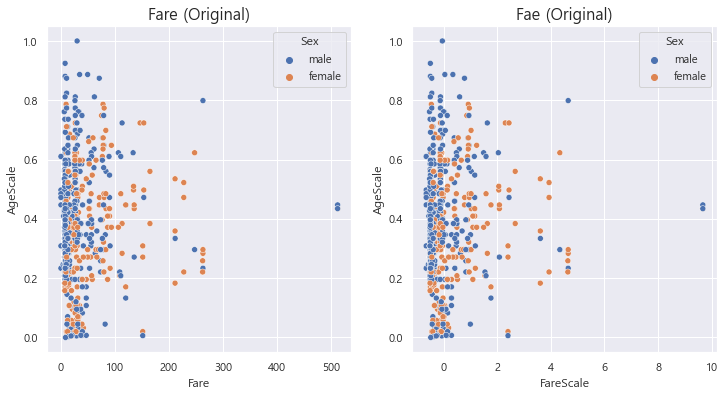

In [115]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
scatter_plot = sns.scatterplot(x='Fare',y='AgeScale',hue = 'Sex',data=train)
plt.title('Fare (Original)', fontsize = 16)
plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(x='FareScale',y='AgeScale',hue = 'Sex',data=train)
plt.title('Fae (Original)', fontsize = 16)
plt.show()

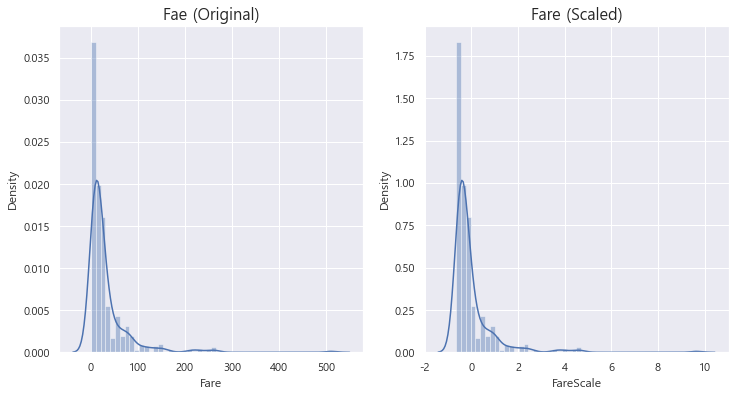

In [116]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dist_plot = sns.distplot(train['Fare'],label = 'Fare')
plt.title('Fae (Original)',fontsize = 16)
plt.subplot(1,2,2)
dist_plot = sns.distplot(train['FareScale'],label = 'FareScale')
plt.title('Fare (Scaled)',fontsize = 16)
plt.show()